<a href="https://colab.research.google.com/github/ChaSangguk/foundingmetro/blob/master/Lecture_10_(3)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Layer Perceptron with MNIST handwritten digits classification

아래의 코드에서 주석 처리 되어 있는 부분을 채워 넣으시면 됩니다.

## 1. Module Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets
import torchvision.transforms as transforms

## 2. 딥러닝 모델을 설계할 때 활용하는 장비 확인

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', device)

Using PyTorch version: 2.9.0+cu126  Device: cpu


## 3. MNIST 데이터 다운로드 (Train data와 Test data 분리하기)

In [3]:
BATCH_SIZE =32

train_data = datasets.MNIST('./data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST('./data', train=False, download=True, transform=transforms.ToTensor())# 여기에 코드를 채워 넣으세요

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)# 여기에 코드를 채워 넣으세요


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 490kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.47MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.72MB/s]


## 4. 첫번째 batch 데이터의 크기와 타입을 확인하기

In [4]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


## 5. 첫번째 batch 데이터를 시각화하여 확인하기

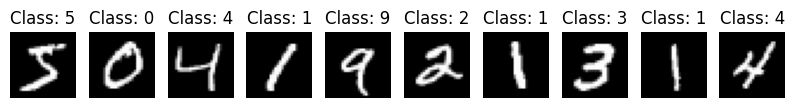

In [5]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i].numpy().squeeze(), cmap='gray')
    # 아래와 같이 보이도록 수정하세요
    plt.title('Class: ' + str(y_train[i].item()))

![image.png](attachment:image.png)

# Gradient Descent 문제
주어진 함수 f를 최소로 만드는 x 값을 pytorch 라이브러리를 이용하여 찾으세요.

In [6]:
def f(x):
    #x = np.array(x)
    return x[0]**2+x[1]**2

위 함수는 벡터를 입력으로 받습니다.

In [7]:
x = torch.tensor([10,20], dtype=torch.float, requires_grad = True)

초기값은 아래와 같이 설정합니다.

loss 값은 함수 f 에 위 초기값 x 을 입력한 값입니다. 우리는 이 loss 값을 최소로 만드는 x 값을 찾는 것이 목표입니다.

In [8]:
loss = f(x)
print(loss)

tensor(500., grad_fn=<AddBackward0>)


In [9]:
# loss 값을 미분합니다.
loss.backward()


x 에 대하여 loss 값을 미분한 값을 구합니다. 즉 $\nabla_x f$ 값을 구합니다.

In [10]:
# 미분한 값을 구합니다.
print(x.grad)

tensor([20., 40.])


1.학습 속도 (learning rate)를 정합니다.

2.그 후 반복적으로 x 값을 변경합니다.

3.변경된 x를 다시 함수 f에 넣고 실제로 x값이 변경함에 따라 함수 f가 줄어드는 것을 확인합니다.

In [11]:
learning_rate = 0.1
for i in range(20):

    loss = f(x)# 함수 f 에 새로운 x 값을 입력합니다.
    # loss를 자동 미분합니다.
    loss.backward()
    print(loss)

    with torch.no_grad():
        x = x-learning_rate * x.grad# 새로운 x 값을 gradient를 이용해 구합니다.

    x.requires_grad = True
    print(x)

tensor(500., grad_fn=<AddBackward0>)
tensor([ 6., 12.], requires_grad=True)
tensor(180., grad_fn=<AddBackward0>)
tensor([4.8000, 9.6000], requires_grad=True)
tensor(115.2000, grad_fn=<AddBackward0>)
tensor([3.8400, 7.6800], requires_grad=True)
tensor(73.7280, grad_fn=<AddBackward0>)
tensor([3.0720, 6.1440], requires_grad=True)
tensor(47.1859, grad_fn=<AddBackward0>)
tensor([2.4576, 4.9152], requires_grad=True)
tensor(30.1990, grad_fn=<AddBackward0>)
tensor([1.9661, 3.9322], requires_grad=True)
tensor(19.3274, grad_fn=<AddBackward0>)
tensor([1.5729, 3.1457], requires_grad=True)
tensor(12.3695, grad_fn=<AddBackward0>)
tensor([1.2583, 2.5166], requires_grad=True)
tensor(7.9165, grad_fn=<AddBackward0>)
tensor([1.0066, 2.0133], requires_grad=True)
tensor(5.0666, grad_fn=<AddBackward0>)
tensor([0.8053, 1.6106], requires_grad=True)
tensor(3.2426, grad_fn=<AddBackward0>)
tensor([0.6442, 1.2885], requires_grad=True)
tensor(2.0753, grad_fn=<AddBackward0>)
tensor([0.5154, 1.0308], requires_grad=T

 x 이 수렴되는 예상값은 무엇입니까?
 왜 그렇게 생각하나요?
 아래 cell에서 함수 f를 Wireframe plots 으로 그려보시고 그림과 우리가 한 작업을 설명해보세요.

In [12]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

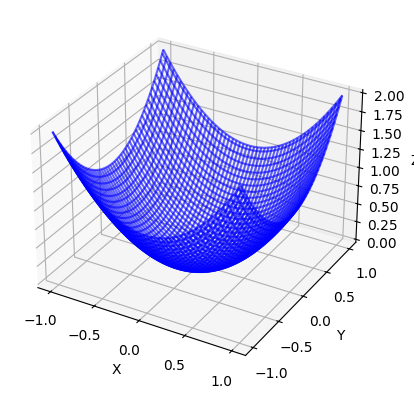

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Grab some test data.
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)

X,Y = np.meshgrid(x,y)

# Z 값을 결정하세요
Z = X**2 + Y**2
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, color='blue', alpha=0.6)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')# wireframe 으로 그림을 그리세요
plt.show()


x가 수렴되는 예상값은 [0,0]이다.
f(x)는 각 성분의 제곱의 합이다. 따라서 항상 0이상이니 함수값의 최소값은 0,0이 될 수 밖에 없다.
wireframe flot으로 출력된 값은 그릇모양의 포물선 일것이다. 그래서 gradient descent를 진행하면 최소값인 0,0으로 수렴하기 때문이다.

In [17]:
!jupyter nbconvert --to html "/var/tmp"

[NbConvertApp] Converting notebook /var/tmp to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/jupyter_core/application.py", line 284, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.12/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.12/dist-packages/nbconvert/nbconvertapp.py", line 420, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.12/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.12/dist-packages/nbconvert/nbconvertapp.py", line 563, in convert_single_notebook
    output, resources = self.export_single_notebook(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/